In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Naming Columns
column=['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River','NO2 concentration',
        'Average Rooms/Dwelling','Prior Built Units Proportion', ' Distance to Employeent Centres','Radial Highways'
        ' Distance','ValueProperty/tax rate','Teacher/town','blacks/town','lower Status Percent','Median home price']
columns=column[:-1]
target='Median home price'

In [5]:
df.columns=column

In [6]:
### Checking Null Values
df.isnull().sum()

Crime Rate                         0
Residential Proportion             0
non-retail business acres/Town     0
Charles River                      0
NO2 concentration                  0
Average Rooms/Dwelling             5
Prior Built Units Proportion       0
 Distance to Employeent Centres    0
Radial Highways Distance           0
ValueProperty/tax rate             0
Teacher/town                       0
blacks/town                        0
lower Status Percent               0
Median home price                  0
dtype: int64

In [7]:
df.describe()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling,Prior Built Units Proportion,Distance to Employeent Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,lower Status Percent,Median home price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
### Filling Null Values
df['Average Rooms/Dwelling'].fillna(df['Average Rooms/Dwelling'].mean(),inplace=True)

C:\Users\aliah\AppData\Local\Temp\ipykernel_16576\1831794740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Rooms/Dwelling'].fillna(df['Average Rooms/Dwelling'].mean(),inplace=True)


EDA results discussed above are reused here; therefore,
feature distributions and correlations are not repeated.

### Creating independent and Dependant Variables X and Y 

In [9]:
X=df.drop(['Median home price'],axis=True)
Y=df[[target]]

### Normalizing Data

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(X)
X=pd.DataFrame(x_scaled_minmax,columns=columns)

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)


(354, 13) (354, 1)
(152, 13) (152, 1)


### Applying Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [13]:
model.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Predicting Values

In [14]:
pred=model.predict(xtest)
pred2=model.predict(xtrain)

### Finding r2 Score


In [15]:
from sklearn.metrics import r2_score
r2_test=r2_score(ytest,pred)
r2_train=r2_score(ytrain,pred2)

In [16]:
print('The R2 score for training data is : ' ,r2_train )
print('The R2 score for testing data is : ' ,r2_test )


The R2 score for training data is :  0.7431646527497848
The R2 score for testing data is :  0.7120610333156985


### Residual Plot

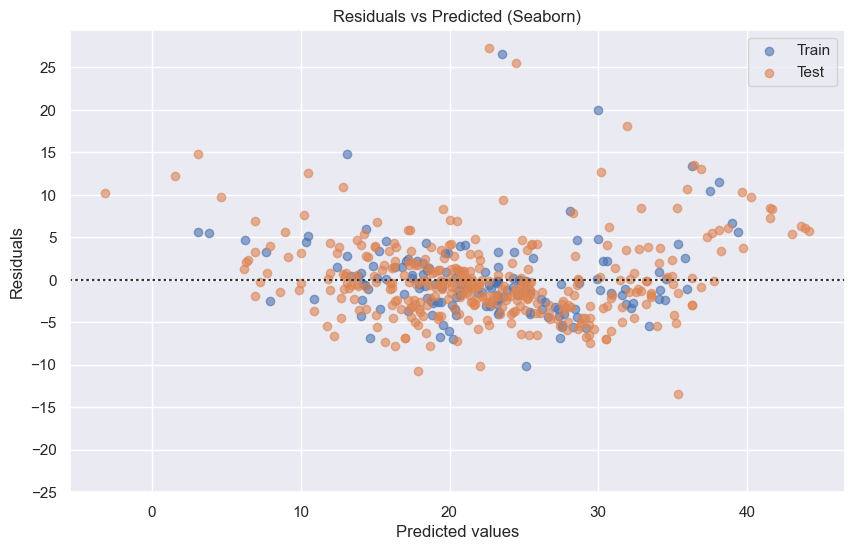

In [17]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.residplot(x=pred,
               y=ytest.values,
                lowess=False,
                scatter_kws={'alpha':0.6},
                label='Train')
sns.residplot(x=pred2,
             y=ytrain.values,
             scatter_kws={'alpha':0.6},
             label='Test')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Seaborn)")
plt.yticks(np.arange(-25, 30, 5))
# plt.xticks(np.arange(0,10,15,20,25,30,35,40))
plt.legend()
plt.show()

## Applying  Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)

In [19]:
x_train_poly=poly_features.fit_transform(xtrain)

In [20]:
x_train_poly.shape

(354, 105)

In [21]:
# fiting the transformed features to linear regression
poly_model=LinearRegression()
poly_model.fit(x_train_poly,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
#predicting on trainig dataset
y_train_predict=poly_model.predict(x_train_poly)

In [23]:
#predicitng on testing data set
x_test_poly=poly_features.fit_transform(xtest)
y_test_predict=poly_model.predict(x_test_poly)

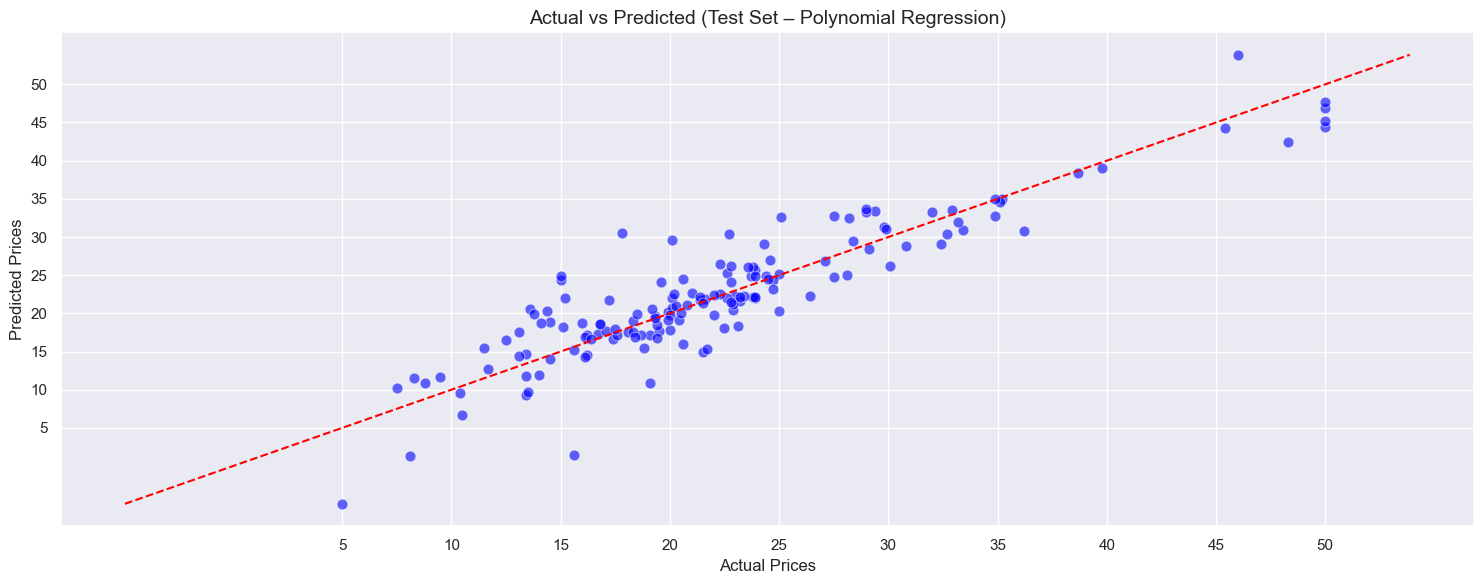

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make sure ytest and y_test_predict are either pandas DataFrame/Series or NumPy arrays
def to_1d_array(x):
    if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
        return x.to_numpy().ravel()  # convert pandas to 1D NumPy array
    elif isinstance(x, np.ndarray):
        return x.ravel()             # flatten NumPy array if 2D
    else:
        raise ValueError("Input must be a pandas DataFrame/Series or NumPy array")

y_actual = to_1d_array(ytest)
y_pred = to_1d_array(y_test_predict)

plt.figure(figsize=(15,6))

# Scatter plot
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6, color='blue', s=60)

# 45° reference line
lims = [min(min(y_actual), min(y_pred)), max(max(y_actual), max(y_pred))]
sns.lineplot(x=lims, y=lims, color='red', linestyle='--')

plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.title('Actual vs Predicted (Test Set – Polynomial Regression)', fontsize=14)

# Optional ticks
plt.xticks(range(5, 51, 5))
plt.yticks(range(5, 51, 5))

plt.tight_layout()
plt.show()


In [25]:
#Evaluating the model on training dataset
r2_test=r2_score(ytest,y_test_predict)
r2_train=r2_score(ytrain,y_train_predict)

In [26]:
print('The r2 score of training data is : ' , r2_train)
print('The r2 score of testing data is : ' , r2_test)


The r2 score of training data is :  0.9318840602460623
The r2 score of testing data is :  0.8137896801400587


From Analyzing the r2 scores we see that our model has been overfit

In [27]:
def adjusted_r2(n,p,train_r2):
    return 1-(1-train_r2)*(n-1)/(n-p-1)
n=xtrain.shape[0]
p=xtrain.shape[1]
# print('The adjusted r2 score of x train:',adjusted_r2(n,p,r2_train))


In [28]:
def adjusted_r2(n,p,test_r2):
    return 1-(1-test_r2)*(n-1)/(n-p-1)
n=xtest.shape[0]
p=xtest.shape[1]
# print('The adjusted r2 score of x test:',adjusted_r2(n,p, r2_test))


In [29]:
print('The adjusted r2 score of x train:',adjusted_r2(n,p,r2_train))
print('The adjusted r2 score of x test:',adjusted_r2(n,p, r2_test))


The adjusted r2 score of x train: 0.9254673412837349
The adjusted r2 score of x test: 0.7962481282691947


## Observation: Overfitting in Polynomial Regression

Although Polynomial Regression was applied to capture non-linear relationships,
the model showed signs of overfitting.
This is because polynomial models increase feature complexity,
which is not well-suited for small datasets like Boston Housing.

As a result, Polynomial Regression did not generalize better than Linear Regression.

### Finding Best degree 

In [30]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score
mse_train=[]
mse_test=[]
mse_cv=[]
r2_train=[]
r2_test=[]
r2_cv=[]
for i in range (1,8):
    poly_reg=PolynomialFeatures(degree=i)
    
    x_tr_poly=poly_reg.fit_transform(xtrain)
    x_tst_poly=poly_reg.fit_transform(xtest)
    # Trainig 
    poly=LinearRegression()
    poly.fit(x_tr_poly,ytrain)
    # Prediction
    y_tr_predicted=poly.predict(x_tr_poly)
    y_tst_predict=poly.predict(x_tst_poly)
    # Cross Validation
    mse_cv_scores=cross_val_score(poly,x_tr_poly,ytrain,cv=5,scoring=make_scorer(mean_squared_error))
    r2_cv_scores = cross_val_score(poly, x_tr_poly, ytrain, cv=5, scoring='r2')

    r2_train.append(r2_score(ytrain,y_tr_predicted))
    r2_test.append(r2_score(ytest,y_tst_predict))
    r2_cv.append(r2_cv_scores.mean())

    mse_train.append(mean_squared_error(ytrain,y_tr_predicted))
    mse_test.append(mean_squared_error(ytest,y_tst_predict))
    mse_cv.append(mse_cv_scores.mean())



### Comparison of r2

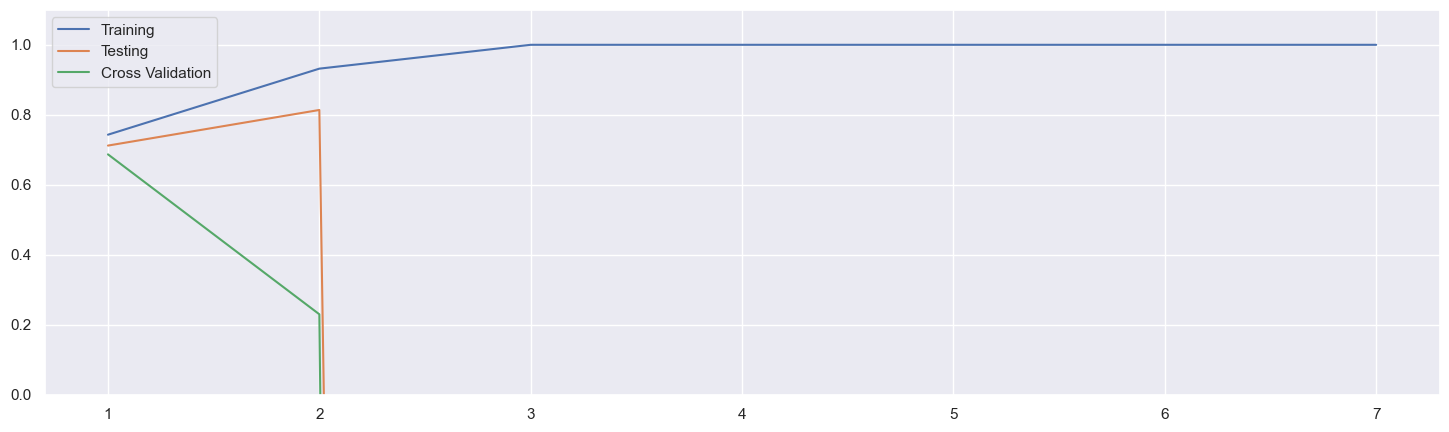

In [31]:
plt.figure(figsize=(18,5))
sns.lineplot(x=list(range(1,8)),y=r2_train,label='Training')
sns.lineplot(x=list(range(1,8)),y=r2_test,label='Testing')
sns.lineplot(x=list(range(1,8)),y=r2_cv,label='Cross Validation')
plt.ylim(0,1.1)
plt.show()

### Why we made this graph???

We evaluated polynomial regression with different degrees using training, testing and cross-validation R² scores to identify the optimal model complexity. The graph shows that higher degrees lead to overfitting as training accuracy becomes perfect while testing and cross-validation accuracy drop significantly. Therefore, degree 1 provides the best generalization

### Comparison of Mean Squared Error

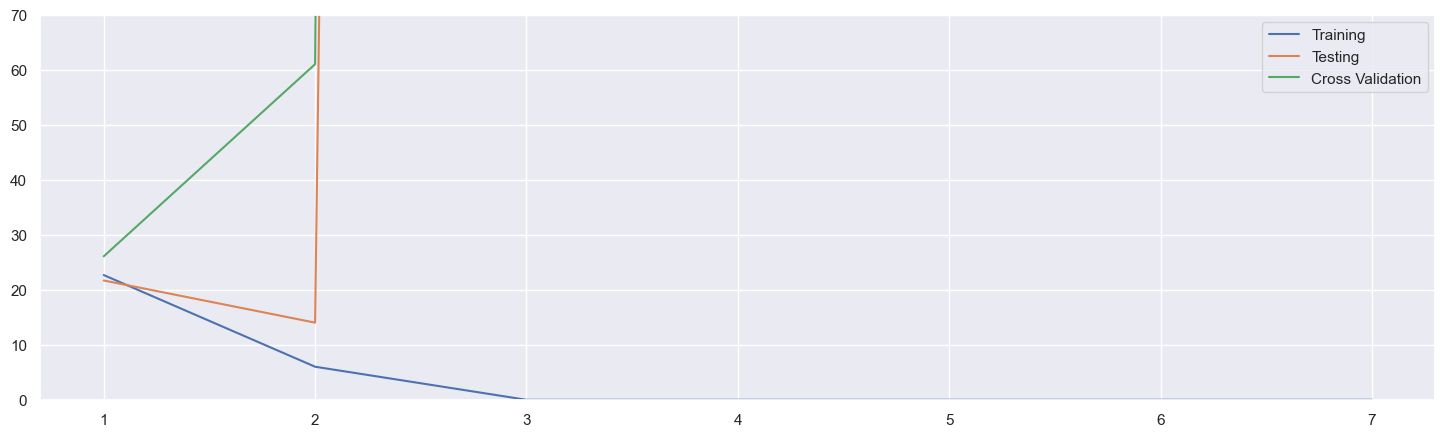

In [32]:
plt.figure(figsize=(18,5))
sns.lineplot(x=list(range(1,8)),y=mse_train,label='Training')
sns.lineplot(x=list(range(1,8)),y=mse_test,label='Testing')
sns.lineplot(x=list(range(1,8)),y=mse_cv,label='Cross Validation')
plt.ylim(0,70)
plt.show()

### “Why did we plot MSE graph?”


“We plotted training, testing and cross-validation MSE across different polynomial degrees to analyze model error and detect overfitting. The graph shows that although training error decreases with higher degrees, cross-validation error increases significantly, indicating overfitting. Therefore, degree 1 provides the most reliable and generalized performance.”